# Softmax 回归


## 第一部分：Softmax 回归基础理论

### 1.1 什么是分类问题？

**回归 vs 分类**：

- **回归问题**：预测连续的数值，比如房价预测（房价可以是任意实数）
- **分类问题**：预测离散的类别，比如图像识别（一张图片要么是猫，要么是狗，要么是鸡）

**分类问题的例子**：

- 邮件是否为垃圾邮件（二分类）
- 图像中的物体是什么（多分类）
- 用户可能喜欢哪类电影（多分类）


### 1.2 重要专有名词解释

#### 1.2.1 独热编码（One-hot Encoding）

**通俗解释**：想象你在餐厅点菜，菜单上有 10 道菜，你只能选一道。独热编码就像是一个长度为 10 的向量，只有你选择的那道菜对应的位置是 1，其他位置都是 0。

**数学表示**：

- 如果有 3 个类别：猫、狗、鸡
- 猫：$[1, 0, 0]$
- 狗：$[0, 1, 0]$
- 鸡：$[0, 0, 1]$

**为什么要用独热编码**：因为类别之间没有大小关系。如果用数字 1、2、3 表示，会让模型误认为"鸡"比"猫"大，这是不合理的。

#### 1.2.2 Softmax 函数

**通俗解释**：Softmax 就像是一个"概率分配器"。给定一组分数，它能将这些分数转换为概率，使得：

1. 所有概率都是正数
2. 所有概率加起来等于 1

**数学公式**：

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

其中 $x_i$ 是第 $i$ 个类别的原始分数，$n$ 是类别总数。

**举例**：假设模型对一张图片给出原始分数 $[2.0, 1.0, 0.1]$

- 经过 Softmax 后变成概率：$[0.66, 0.24, 0.10]$
- 解释：66%可能是第 1 类，24%可能是第 2 类，10%可能是第 3 类

#### 1.2.3 交叉熵损失（Cross-Entropy Loss）

**通俗解释**：交叉熵损失衡量的是"我们的预测与真实答案有多不一致"。

- 如果预测完全正确，损失为 0
- 如果预测完全错误，损失会很大

**数学公式**：

$$\text{CrossEntropy} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)$$

其中：

- $y_i$ 是真实标签（独热编码）
- $\hat{y}_i$ 是预测概率
- $n$ 是类别数量

**直观理解**：假设真实答案是"猫"，我们预测：

- 90%是猫，10%是狗 → 损失较小（预测基本正确）
- 10%是猫，90%是狗 → 损失很大（预测很错误）

#### 1.2.4 仿射变换（Affine Transformation）

**通俗解释**：仿射变换就是"线性变换 + 平移"，数学公式是：

$$\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$$

其中：

- $\mathbf{W}$ 是权重矩阵（控制如何组合输入特征）
- $\mathbf{b}$ 是偏置向量（控制输出的基准值）
- 这就像是加权求和再加上一个常数

**举例**：计算考试总分

$$\text{总分} = \text{数学成绩} \times 0.4 + \text{英语成绩} \times 0.6 + 10$$

这里 0.4、0.6 是权重，10 是偏置（平时分）


### 1.3 Softmax 回归的网络架构

#### 1.3.1 整体架构理解

Softmax 回归是一个**单层神经网络**，专门用于多分类问题。

**架构组成**：

```
输入层 → 全连接层（仿射变换） → Softmax函数 → 输出概率
```

**数学表示**：

$$\mathbf{o} = \mathbf{W}\mathbf{x} + \mathbf{b}$$
$$\hat{\mathbf{y}} = \text{softmax}(\mathbf{o})$$

其中：

- $\mathbf{x} \in \mathbb{R}^d$ 是输入特征向量
- $\mathbf{W} \in \mathbb{R}^{q \times d}$ 是权重矩阵
- $\mathbf{b} \in \mathbb{R}^q$ 是偏置向量
- $\mathbf{o} \in \mathbb{R}^q$ 是线性变换的输出（logits）
- $\hat{\mathbf{y}} \in \mathbb{R}^q$ 是最终的概率分布

**具体过程**：

1. **输入**：特征向量（如图像的像素值）
2. **全连接层**：通过权重矩阵和偏置进行线性变换
3. **Softmax**：将线性变换的结果转换为概率分布
4. **输出**：每个类别的概率

#### 1.3.2 参数数量计算

**重要概念**：全连接层的参数开销

对于输入维度 $d$、输出类别数 $q$ 的全连接层：

- **权重参数**：$d \times q$ 个
- **偏置参数**：$q$ 个
- **总参数**：$d \times q + q = q(d + 1)$ 个

**数学表示**：

$$\text{参数总数} = |\mathbf{W}| + |\mathbf{b}| = d \times q + q = q(d + 1)$$

**举例**：Fashion-MNIST 图像分类

- 输入：$28 \times 28 = 784$ 个像素
- 输出：$10$ 个类别
- 参数总数：$784 \times 10 + 10 = 7850$ 个参数


### 1.4 Softmax 函数的数学原理

#### 1.4.1 为什么需要 Softmax？

**问题**：线性层的输出可能是任意实数，但我们需要概率：

- 概率必须是非负数
- 所有概率之和必须等于 1

**解决方案**：Softmax 函数

#### 1.4.2 Softmax 公式解释

**完整的 Softmax 公式**：

$$\text{softmax}(\mathbf{o})_j = \frac{\exp(o_j)}{\sum_{k=1}^{q} \exp(o_k)}$$

或者用向量形式表示：

$$\hat{\mathbf{y}} = \text{softmax}(\mathbf{o}) = \frac{\exp(\mathbf{o})}{\sum_{k=1}^{q} \exp(o_k)}$$

其中：

- $\mathbf{o} = [o_1, o_2, \ldots, o_q]^T$ 是线性层的输出（logits）
- $q$ 是类别总数
- $\exp(\mathbf{o}) = [\exp(o_1), \exp(o_2), \ldots, \exp(o_q)]^T$

**逐步理解**：

1. **第一步**：对每个输出 $o_j$ 取指数 $\exp(o_j)$
   - 作用：确保所有值都是正数
2. **第二步**：计算所有指数的和作为分母
   - 作用：作为归一化常数
3. **第三步**：每个指数值除以总和
   - 作用：确保所有概率和为 1

**数值例子**：

假设原始输出：$\mathbf{o} = [2.0, 1.0, 0.1]$

- 取指数：$\exp(\mathbf{o}) = [\exp(2.0), \exp(1.0), \exp(0.1)] = [7.389, 2.718, 1.105]$
- 求和：$\sum_{k=1}^{3} \exp(o_k) = 7.389 + 2.718 + 1.105 = 11.212$
- Softmax 结果：$\hat{\mathbf{y}} = [0.659, 0.242, 0.099]$

验证：$0.659 + 0.242 + 0.099 = 1.000$ ✓

#### 1.4.3 Softmax 的重要性质

1. **单调性**：原始分数越大，对应概率越大
   $$o_i > o_j \Rightarrow \text{softmax}(\mathbf{o})_i > \text{softmax}(\mathbf{o})_j$$

2. **概率性**：输出是有效的概率分布

   - $\text{softmax}(\mathbf{o})_j > 0$ 对所有 $j$
   - $\sum_{j=1}^{q} \text{softmax}(\mathbf{o})_j = 1$

3. **可微性**：可以用梯度下降优化
   $$\frac{\partial \text{softmax}(\mathbf{o})_j}{\partial o_i} = \text{softmax}(\mathbf{o})_j(\delta_{ij} - \text{softmax}(\mathbf{o})_i)$$

   其中 $\delta_{ij}$ 是 Kronecker delta 函数

4. **数值稳定性**：实际计算时使用数值稳定的版本
   $$\text{softmax}(\mathbf{o})_j = \frac{\exp(o_j - \max(\mathbf{o}))}{\sum_{k=1}^{q} \exp(o_k - \max(\mathbf{o}))}$$


## 第二部分：图像分类数据集

### 2.1 Fashion-MNIST 数据集介绍

#### 2.1.1 什么是 Fashion-MNIST？

**Fashion-MNIST**是一个服装图像分类数据集，被设计来替代经典的 MNIST 手写数字数据集。

**数据集特点**：

- **图像尺寸**：28×28 像素
- **颜色**：灰度图像（单通道）
- **类别数量**：10 个服装类别
- **训练样本**：60,000 张图像
- **测试样本**：10,000 张图像

#### 2.1.2 十个服装类别详解

| 标签 | 英文名称    | 中文名称 | 说明        |
| ---- | ----------- | -------- | ----------- |
| 0    | T-shirt/top | T 恤     | 短袖上衣    |
| 1    | Trouser     | 裤子     | 长裤        |
| 2    | Pullover    | 套衫     | 套头衫      |
| 3    | Dress       | 连衣裙   | 女装裙子    |
| 4    | Coat        | 外套     | 大衣/外套   |
| 5    | Sandal      | 凉鞋     | 夏季鞋类    |
| 6    | Shirt       | 衬衫     | 正装衬衫    |
| 7    | Sneaker     | 运动鞋   | 休闲鞋      |
| 8    | Bag         | 包       | 手提包/背包 |
| 9    | Ankle boot  | 短靴     | 踝靴        |

#### 2.1.3 为什么选择 Fashion-MNIST？

1. **适中难度**：比 MNIST 更有挑战性，比真实图像简单
2. **标准化**：图像大小统一，便于模型训练
3. **充足数据**：7 万张图像足够训练深度学习模型
4. **多样性**：10 个类别涵盖不同类型的服装


In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from IPython import display

print("PyTorch版本:", torch.__version__)

PyTorch版本: 2.7.1+cu128


In [2]:
# 定义批量大小，决定一次迭代处理的样本数
batch_size = 256

# 加载Fashion-MNIST数据集的训练和测试迭代器
# train_iter和test_iter将用于在训练和测试过程中提供数据批次
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
# Fashion-MNIST 数据维度分析
def print_header(title):
    """打印格式化标题"""
    print(f"\n{'='*60}")
    print(f"{title:^60}")
    print("=" * 60)


def print_section(title):
    """打印章节标题"""
    print(f"\n📊 {title}")
    print("-" * 50)


# 确保只执行一次分析
print_header("Fashion-MNIST 数据维度核心分析")

# 获取一个批次数据进行分析
X, y = next(iter(train_iter))

# 1. 数据基本信息
print_section("数据集基本信息")
print(f"批次大小 (Batch Size)    : {batch_size}")
print(f"训练批次数量             : {len(train_iter):,}")
print(f"测试批次数量             : {len(test_iter):,}")
print(f"训练样本总数             : {len(train_iter) * batch_size:,}")
print(f"测试样本总数             : {len(test_iter) * batch_size:,}")

# 2. 张量维度核心信息
print_section("张量维度信息")
print(f"🖼️  特征张量 X 形状       : {X.shape}")
print(
    f"    维度解释             : [批次={X.shape[0]}, 通道={X.shape[1]}, 高={X.shape[2]}, 宽={X.shape[3]}]"
)
print(f"    单图像像素数         : {X.shape[1] * X.shape[2] * X.shape[3]:,}")
print(f"    数据类型             : {X.dtype}")
print(f"    数值范围             : [{X.min().item():.3f}, {X.max().item():.3f}]")

print(f"\n🏷️  标签张量 y 形状       : {y.shape}")
print(f"    维度解释             : [批次大小={y.shape[0]}]")
print(f"    标签范围             : [{y.min().item()}, {y.max().item()}]")
print(f"    类别总数             : {len(torch.unique(y))}")

# 3. 模型参数维度
print_section("Softmax回归模型参数")
X_flattened = X.view(X.shape[0], -1)  # 展平图像
num_inputs = X_flattened.shape[1]  # 输入特征数
num_outputs = len(torch.unique(y))  # 输出类别数

print(f"输入维度 (展平后)        : {num_inputs:,}")
print(f"输出维度 (类别数)        : {num_outputs}")
print(f"权重矩阵 W 形状          : ({num_inputs:,}, {num_outputs})")
print(f"偏置向量 b 形状          : ({num_outputs},)")
print(f"总参数数量               : {num_inputs * num_outputs + num_outputs:,}")

# 4. 形状变换演示
print_section("关键形状变换")
print(f"原始图像形状             : {X.shape}")
print(f"展平后形状               : {X_flattened.shape}")
print(f"变换公式                 : X.view(batch_size, -1)")
print(f"适用场景                 : 全连接层输入")

# 5. 当前批次类别分布（简化版）
print_section("当前批次类别分布")
label_counts = torch.bincount(y)
labels = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Boot",
]

print("类别ID  类别名称     样本数  占比")
print("-" * 35)
for i, count in enumerate(label_counts):
    if count > 0:
        percentage = count.item() / y.shape[0] * 100
        print(f"{i:^6}  {labels[i]:<10}  {count.item():^6}  {percentage:>4.1f}%")

# 结束标记
print(f"\n{'='*60}")
print("✅ 数据维度分析完成".center(60))
print("=" * 60)


                   Fashion-MNIST 数据维度核心分析                   

📊 数据集基本信息
--------------------------------------------------
批次大小 (Batch Size)    : 256
训练批次数量             : 235
测试批次数量             : 40
训练样本总数             : 60,160
测试样本总数             : 10,240

📊 张量维度信息
--------------------------------------------------
🖼️  特征张量 X 形状       : torch.Size([256, 1, 28, 28])
    维度解释             : [批次=256, 通道=1, 高=28, 宽=28]
    单图像像素数         : 784
    数据类型             : torch.float32
    数值范围             : [0.000, 1.000]

🏷️  标签张量 y 形状       : torch.Size([256])
    维度解释             : [批次大小=256]
    标签范围             : [0, 9]
    类别总数             : 10

📊 Softmax回归模型参数
--------------------------------------------------
输入维度 (展平后)        : 784
输出维度 (类别数)        : 10
权重矩阵 W 形状          : (784, 10)
偏置向量 b 形状          : (10,)
总参数数量               : 7,850

📊 关键形状变换
--------------------------------------------------
原始图像形状             : torch.Size([256, 1, 28, 28])
展平后形状               : torch.Size([256, 

### 2.2 数据维度分析结果详解

通过上面的代码分析，我们得到了 Fashion-MNIST 数据集的详细信息。让我逐一解释这些输出结果的含义：

#### 📊 数据集基本信息解读

**批次大小 (Batch Size): 256**

- **含义**: 每次训练迭代处理 256 张图像
- **作用**: 批次大小影响训练效率和内存使用
- **为什么选择 256**: 这是一个常用的批次大小，平衡了计算效率和内存占用

**训练批次数量: 235**

- **计算**: 总训练样本 $\div$ 批次大小 = $60,000 \div 256 \approx 235$
- **含义**: 完整遍历一遍训练集需要 235 次迭代

**测试批次数量: 40**

- **计算**: 总测试样本 $\div$ 批次大小 = $10,000 \div 256 \approx 40$
- **含义**: 完整评估一遍测试集需要 40 次迭代

#### 🖼️ 张量维度信息解读

**特征张量 X 形状: $[256, 1, 28, 28]$**

- **$[256]$**: 批次维度，表示同时处理 256 张图像
- **$[1]$**: 通道维度，1 表示灰度图像（彩色图像为 3）
- **$[28, 28]$**: 图像的高度和宽度，每张图像都是 $28 \times 28$ 像素

**单图像像素数: 784**

- **计算**: $1 \times 28 \times 28 = 784$
- **含义**: 每张图像包含 784 个像素值
- **重要性**: 这将成为 Softmax 回归模型的输入特征数量

**数据类型: torch.float32**

- **含义**: 使用 32 位浮点数存储像素值
- **范围**: 每个像素值占用 4 字节内存

**数值范围: $[0.000, 1.000]$**

- **含义**: 像素值已经归一化到 $[0,1]$ 之间
- **好处**: 归一化有助于模型训练的稳定性和收敛速度

#### 🏷️ 标签张量信息解读

**标签张量 y 形状: $[256]$**

- **含义**: 一维张量，包含 256 个标签值
- **对应关系**: 每个标签对应批次中的一张图像

**标签范围: $[0, 9]$**

- **含义**: 标签值从 0 到 9，对应 10 个服装类别
- **编码方式**: 使用整数编码而非独热编码（节省内存）

#### ⚙️ Softmax 回归模型参数解读

**输入维度 (展平后): 784**

- **来源**: $28 \times 28 = 784$ 个像素
- **作用**: 每张图像被展平成 784 维的特征向量

**输出维度 (类别数): 10**

- **含义**: 10 个服装类别，模型需要输出 10 个概率值

**权重矩阵 W 形状: $(784, 10)$**

- **含义**: $784$ 行 $10$ 列的矩阵
- **参数数量**: $784 \times 10 = 7,840$ 个权重参数
- **作用**: 将 784 维输入映射到 10 维输出

**偏置向量 b 形状: $(10,)$**

- **含义**: 10 个偏置值，每个输出类别对应一个
- **作用**: 为每个类别提供基准调整

**总参数数量: 7,850**

- **计算**: $7,840\text{（权重）} + 10\text{（偏置）} = 7,850$
- **意义**: 这是一个相对简单的模型，参数数量不大

**数学公式表示**：

$$\text{总参数数量} = |\mathbf{W}| + |\mathbf{b}| = d \times q + q = q(d + 1)$$

其中：
- $d = 784$（输入维度）
- $q = 10$（输出类别数）

#### 🔄 关键形状变换解读

**原始图像形状 → 展平后形状**

- **变换**: $[256, 1, 28, 28] \rightarrow [256, 784]$
- **目的**: 全连接层需要二维输入（批次 $\times$ 特征）
- **方法**: `X.view(batch_size, -1)` 自动计算展平维度

**数学表示**：

$$\mathbf{X}_{\text{flattened}} = \text{reshape}(\mathbf{X}, (\text{batch\_size}, -1))$$

其中 $-1$ 表示自动计算该维度大小。

#### 📈 当前批次类别分布解读

这部分显示了当前批次中各类别的样本分布情况：

**为什么分布不均匀？**

- 数据加载器随机采样，每个批次的类别分布会有所不同
- 这是正常现象，不同批次会有不同的类别组合

**占比计算公式**：

$$\text{占比}_i = \frac{\text{类别}_i\text{的样本数}}{\text{批次总样本数}} \times 100\%$$

**占比的重要性**：

- 帮助了解数据的随机性
- 检查是否存在严重的类别不平衡
- 一般来说，每个类别在大批次中应该大致相等（约 $10\%$）

#### 💡 关键要点总结

1. **数据规模**: $7$ 万张 $28 \times 28$ 的灰度图像，分为 $10$ 个类别
2. **模型简单**: Softmax 回归只有 $7,850$ 个参数，计算效率高
3. **内存友好**: 每个批次约占用不到 $1\text{MB}$ 内存
4. **标准化**: 数据已预处理，像素值在 $[0,1]$ 范围内
5. **维度变换**: 理解 $4\text{D} \rightarrow 2\text{D}$ 的展平过程对后续模型构建很重要

#### 🧮 内存占用详细计算

**单张图像内存占用**：
$$\text{内存} = 1 \times 28 \times 28 \times 4\text{字节} = 3,136\text{字节} = 3.06\text{KB}$$

**单批次图像内存占用**：
$$\text{内存} = 256 \times 3.06\text{KB} = 784\text{KB} \approx 0.77\text{MB}$$

**模型参数内存占用**：
$$\text{内存} = 7,850 \times 4\text{字节} = 31,400\text{字节} = 30.7\text{KB}$$


## 第三部分：Softmax 回归模型实现

### 3.1 初始化模型参数


In [4]:
# 定义输入和输出的维度
num_inputs = 784
num_outputs = 10

# 初始化权重矩阵W，使用均值为0，标准差为0.01的正态分布随机数
# 权重矩阵的尺寸由输入维度和输出维度决定
# requires_grad设为True以启用梯度计算，用于反向传播
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)

# 初始化偏置向量b，所有元素初始化为0
# 偏置向量的长度等于输出维度
# 同样启用梯度计算以支持反向传播
b = torch.zeros(num_outputs, requires_grad=True)

In [5]:
print("初始化模型参数")
print("=" * 40)
print(f"权重矩阵 W 的形状: {W.shape}")
print(f"偏置向量 b 的形状: {b.shape}")
print(f"总参数数量: {W.numel() + b.numel()}")
print(f"参数初始化: W用小随机数，b初始化为0")

初始化模型参数
权重矩阵 W 的形状: torch.Size([784, 10])
偏置向量 b 的形状: torch.Size([10])
总参数数量: 7850
参数初始化: W用小随机数，b初始化为0


### 3.2 模型参数初始化结果详解

通过上面的代码，我们成功初始化了 Softmax 回归模型的参数。让我详细解释输出结果的含义：

#### 🎯 参数初始化核心信息解读

**权重矩阵 W 的形状: $(784, 10)$**

- **维度含义**：
  - **784**：输入特征维度，对应展平后的图像像素数 $(28 \times 28 = 784)$
  - **10**：输出类别数，对应 Fashion-MNIST 的 10 个服装类别
- **数学表示**：$\mathbf{W} \in \mathbb{R}^{784 \times 10}$
- **物理意义**：每一列代表一个类别的特征权重，每一行代表一个像素位置对所有类别的贡献

**偏置向量 b 的形状: $(10,)$**

- **维度含义**：10 个偏置值，每个输出类别对应一个偏置
- **数学表示**：$\mathbf{b} \in \mathbb{R}^{10}$
- **物理意义**：为每个类别提供基准调整值，类似于线性回归中的截距项

**总参数数量: 7,850**

- **计算过程**：
  $$\text{总参数} = |\mathbf{W}| + |\mathbf{b}| = 784 \times 10 + 10 = 7,840 + 10 = 7,850$$
- **参数分布**：
  - **权重参数**：$7,840$ 个 $(99.87\%)$
  - **偏置参数**：$10$ 个 $(0.13\%)$

#### 🔧 参数初始化策略解读

**权重矩阵 W 初始化：小随机数**

- **方法**：从正态分布 $\mathcal{N}(0, 0.01^2)$ 中采样
- **数学表示**：$W_{ij} \sim \mathcal{N}(0, 0.01^2)$
- **为什么用小随机数**：
  1. **打破对称性**：如果所有权重都相同，神经元会学到相同的特征
  2. **避免梯度爆炸**：初始值太大会导致梯度计算时数值不稳定
  3. **保证收敛**：合适的初始化有助于梯度下降找到好的解

**偏置向量 b 初始化：零初始化**

- **方法**：所有偏置初始化为 $0$
- **数学表示**：$b_i = 0, \forall i \in \{1, 2, ..., 10\}$
- **为什么初始化为 0**：
  1. **无偏假设**：开始时不对任何类别有偏好
  2. **简单有效**：零初始化对偏置项来说是安全且有效的选择
  3. **对称性考虑**：让模型在训练初期对所有类别平等对待

#### 📊 内存占用分析

**权重矩阵内存占用**：
$$\text{内存}_{W} = 784 \times 10 \times 4\text{字节} = 31,360\text{字节} = 30.625\text{KB}$$

**偏置向量内存占用**：
$$\text{内存}_{b} = 10 \times 4\text{字节} = 40\text{字节}$$

**总内存占用**：
$$\text{总内存} = 30.625\text{KB} + 40\text{字节} \approx 30.665\text{KB}$$

#### 🧠 梯度计算准备

**requires_grad=True 的重要性**：

- **启用自动微分**：PyTorch 会自动追踪这些参数的计算图
- **支持反向传播**：训练时可以自动计算梯度
- **参数更新**：优化器可以根据梯度更新参数值

**梯度计算过程**：

1. **前向传播**：$\mathbf{o} = \mathbf{X}\mathbf{W} + \mathbf{b}$
2. **损失计算**：$L = \text{CrossEntropy}(\text{softmax}(\mathbf{o}), \mathbf{y})$
3. **反向传播**：$\frac{\partial L}{\partial \mathbf{W}}, \frac{\partial L}{\partial \mathbf{b}}$

#### 💡 初始化效果验证

**检查初始化的合理性**：

```python
# 权重矩阵的统计信息
print(f"W的均值: {W.mean().item():.6f}")
print(f"W的标准差: {W.std().item():.6f}")
print(f"W的最小值: {W.min().item():.6f}")
print(f"W的最大值: {W.max().item():.6f}")
```

**理想的初始化效果**：

- 权重均值接近 $0$
- 权重标准差接近 $0.01$
- 没有异常的极大或极小值
- 偏置全部为 $0$

#### 🎯 关键要点总结

1. **参数规模合理**：$7,850$ 个参数对于 Fashion-MNIST 来说是适中的规模
2. **内存占用小**：总共只需要约 $30.7\text{KB}$ 内存存储参数
3. **初始化策略**：权重用小随机数，偏置用零初始化，这是经典且有效的策略
4. **梯度就绪**：所有参数都启用了梯度计算，为训练做好准备
5. **架构清晰**：简单的线性变换 + Softmax，易于理解和实现


### 3.3 定义 softmax 操作

In [6]:
# 创建一个2x3的二维张量X，包含指定的浮点数值
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# 计算张量X在第0维度（列）上的和，保持维度不变（结果张量的维度与输入张量相同，但第0维度大小为1）
result_dim0 = X.sum(0, keepdim=True)

# 计算张量X在第1维度（行）上的和，保持维度不变（结果张量的维度与输入张量相同，但第1维度大小为1）
result_dim1 = X.sum(1, keepdim=True)

In [7]:
print("张量求和操作示例")
print("=" * 30)
print(f"原始张量 X:\n{X}")
print(f"按列求和: {result_dim0}")
print(f"按行求和: {result_dim1}")
print("这个操作在Softmax中用于计算归一化常数")

(result_dim0, result_dim1)

张量求和操作示例
原始张量 X:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
按列求和: tensor([[5., 7., 9.]])
按行求和: tensor([[ 6.],
        [15.]])
这个操作在Softmax中用于计算归一化常数


(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

### 张量求和操作详解

通过上面的代码，我们演示了张量求和操作，这是实现 Softmax 函数的关键步骤。让我详细解释输出结果的含义：

#### 🎯 张量求和操作核心信息解读

**原始张量 X:**

```
tensor([[1., 2., 3.],
        [4., 5., 6.]])
```

- **形状**: $(2, 3)$ - 2 行 3 列的矩阵
- **数学表示**: $\mathbf{X} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$
- **含义**: 可以理解为 2 个样本，每个样本有 3 个特征

**按列求和 (dim=0): tensor([[5., 7., 9.]])**

- **操作**: `X.sum(0, keepdim=True)`
- **数学表示**: $\sum_{i=0}^{1} X_{i,j}$ 对每列 $j$
- **具体计算**:
  - 第 1 列: $1 + 4 = 5$
  - 第 2 列: $2 + 5 = 7$
  - 第 3 列: $3 + 6 = 9$
- **结果形状**: $(1, 3)$ - 保持维度（keepdim=True）

**按行求和 (dim=1): tensor([[6.], [15.]])**

- **操作**: `X.sum(1, keepdim=True)`
- **数学表示**: $\sum_{j=0}^{2} X_{i,j}$ 对每行 $i$
- **具体计算**:
  - 第 1 行: $1 + 2 + 3 = 6$
  - 第 2 行: $4 + 5 + 6 = 15$
- **结果形状**: $(2, 1)$ - 保持维度（keepdim=True）

#### 🧮 在 Softmax 函数中的应用

**Softmax 归一化常数计算**：

在 Softmax 函数中，我们需要计算每行的指数和作为归一化常数：

$$\text{softmax}(\mathbf{o})_{i,j} = \frac{\exp(o_{i,j})}{\sum_{k=1}^{q} \exp(o_{i,k})}$$

其中分母 $\sum_{k=1}^{q} \exp(o_{i,k})$ 就是按行求和操作：

```python
# 假设 o 是 logits（线性输出）
exp_o = torch.exp(o)                    # 对每个元素取指数
sum_exp_o = exp_o.sum(1, keepdim=True)  # 按行求和，得到归一化常数
softmax_result = exp_o / sum_exp_o      # 每个元素除以对应行的和
```

#### 📊 keepdim 参数的重要性

**keepdim=True 的作用**：

- **保持维度**: 确保求和后张量维度与原张量兼容
- **支持广播**: 便于后续的除法运算
- **避免形状错误**: 防止维度不匹配导致的运算错误

**对比示例**：

```python
# 不保持维度
X.sum(1, keepdim=False)  # 形状: (2,)
# 保持维度
X.sum(1, keepdim=True)   # 形状: (2, 1)
```

#### 🔄 在 Softmax 实现中的具体应用

**完整的 Softmax 实现过程**：

1. **线性变换**: $\mathbf{O} = \mathbf{X}\mathbf{W} + \mathbf{b}$
2. **取指数**: $\mathbf{E} = \exp(\mathbf{O})$
3. **按行求和**: $\mathbf{S} = \mathbf{E}.\text{sum}(1, \text{keepdim}=\text{True})$
4. **归一化**: $\hat{\mathbf{Y}} = \mathbf{E} / \mathbf{S}$

**数学公式表示**：

$$\hat{y}_{i,j} = \frac{\exp(o_{i,j})}{\sum_{k=1}^{q} \exp(o_{i,k})}$$

其中：

- $i$ 表示批次中的第 $i$ 个样本
- $j$ 表示第 $j$ 个类别
- $q$ 表示类别总数

#### 💡 维度理解要点

**批次处理的维度变化**：

- **输入**: $\mathbf{X} \in \mathbb{R}^{N \times d}$ （N 个样本，d 个特征）
- **线性输出**: $\mathbf{O} \in \mathbb{R}^{N \times q}$ （N 个样本，q 个类别）
- **指数**: $\mathbf{E} \in \mathbb{R}^{N \times q}$
- **行求和**: $\mathbf{S} \in \mathbb{R}^{N \times 1}$ （每行一个归一化常数）
- **Softmax 结果**: $\hat{\mathbf{Y}} \in \mathbb{R}^{N \times q}$ （每行概率和为 1）

### 🎯 关键要点总结

1. **求和维度**: `dim=0`按列求和，`dim=1`按行求和
2. **keepdim 作用**: 保持张量维度，支持后续广播运算
3. **Softmax 核心**: 按行求和计算归一化常数是关键步骤
4. **批次处理**: 每个样本独立计算 Softmax，但可以并行处理
5. **数值稳定**: 实际实现中会使用数值稳定的版本避免溢出

#### 🧠 深度理解

**为什么按行求和？**

在分类任务中：

- 每一行代表一个样本对所有类别的"得分"
- 我们需要将这些得分转换为概率分布
- 概率分布要求：所有概率非负且和为 1
- 因此需要按行归一化，即按行求和作为分母


In [8]:
def softmax(X):
    """
    计算softmax函数的输出。

    softmax函数是机器学习中常用的激活函数，特别是在分类任务的输出层。
    它将输入的向量转换为另一个向量，其中元素为非负且和为1，可以解释为概率分布。

    参数:
    X: 输入的张量，通常是模型的输出。

    返回:
    softmax函数的输出，每个元素表示相应类别在输入下的相对概率。
    """
    # 对输入X进行指数运算，使得所有元素变为正数且增加了模型输出的非线性
    X_exp = torch.exp(X)
    # 在指数运算后，为了归一化概率，需要计算每个样本在各个类别上的概率之和
    # 这里使用sum函数沿着类别维度求和，keepdim=True保持了输出的维度与输入相同，便于后续的除法操作
    partition = X_exp.sum(1, keepdim=True)
    # 利用广播机制，将每个元素除以所在样本的概率之和，实现概率归一化
    # 广播机制使得不同形状的张量能够进行运算，这里自动扩展了partition张量
    return X_exp / partition  # 这里应用了广播机制

In [9]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)


In [10]:
print("Softmax函数测试")
print("=" * 25)
print(f"输入 (原始分数):\n{X}")
print(f"Softmax输出 (概率):\n{X_prob}")
print(f"每行概率和: {X_prob.sum(1)}")
print("✓ 每行概率和都等于1，满足概率分布要求")

(X_prob, X_prob.sum(1))

Softmax函数测试
输入 (原始分数):
tensor([[ 1.6142,  0.4090,  0.7797,  0.2213, -0.7567],
        [-1.0409, -0.1811,  1.5252, -0.4980,  0.4804]])
Softmax输出 (概率):
tensor([[0.4818, 0.1444, 0.2092, 0.1197, 0.0450],
        [0.0441, 0.1042, 0.5739, 0.0759, 0.2019]])
每行概率和: tensor([1.0000, 1.0000])
✓ 每行概率和都等于1，满足概率分布要求


(tensor([[0.4818, 0.1444, 0.2092, 0.1197, 0.0450],
         [0.0441, 0.1042, 0.5739, 0.0759, 0.2019]]),
 tensor([1.0000, 1.0000]))

### Softmax函数测试结果详解

通过上面的代码，我们成功实现并测试了 Softmax 函数。让我详细解释输出结果的含义：

#### 🎯 Softmax函数测试核心信息解读

**输入 (原始分数):**

```
tensor([[ 0.0778, -1.6418,  0.0830,  1.8546, -1.0092],
        [-0.2616, -0.7553,  0.3474,  0.1431,  0.8178]])
```

- **数据形状**: $(2, 5)$ - 2 个样本，每个样本有 5 个类别的原始分数
- **数值特点**: 原始分数可以是任意实数（正数、负数、零）
- **数学表示**: $\mathbf{X} \in \mathbb{R}^{2 \times 5}$
- **实际含义**: 这些分数通常是神经网络线性层的输出（logits）

**样本分析**:
- **第1个样本**: $[0.0778, -1.6418, 0.0830, 1.8546, -1.0092]$
  - 最大分数: $1.8546$ (第4个类别)
  - 最小分数: $-1.6418$ (第2个类别)
- **第2个样本**: $[-0.2616, -0.7553, 0.3474, 0.1431, 0.8178]$
  - 最大分数: $0.8178$ (第5个类别)
  - 最小分数: $-0.7553$ (第2个类别)

#### 📊 Softmax输出 (概率) 详解

**概率分布结果:**

```
tensor([[0.1186, 0.0212, 0.1192, 0.7010, 0.0400],
        [0.1267, 0.0774, 0.2330, 0.1900, 0.3729]])
```

**第1个样本的概率分布**:
- **类别1**: $0.1186$ (11.86%)
- **类别2**: $0.0212$ (2.12%) ← **最低概率**
- **类别3**: $0.1192$ (11.92%)
- **类别4**: $0.7010$ (70.10%) ← **最高概率**
- **类别5**: $0.0400$ (4.00%)

**第2个样本的概率分布**:
- **类别1**: $0.1267$ (12.67%)
- **类别2**: $0.0774$ (7.74%)
- **类别3**: $0.2330$ (23.30%)
- **类别4**: $0.1900$ (19.00%)
- **类别5**: $0.3729$ (37.29%) ← **最高概率**

#### 🧮 Softmax变换的数学原理验证

**变换规律验证**:

1. **单调性保持**: 原始分数的大小关系在概率中得到保持
   - 第1样本: $1.8546$ (最大) → $0.7010$ (最大概率)
   - 第1样本: $-1.6418$ (最小) → $0.0212$ (最小概率)

2. **指数放大效应**: Softmax 会放大原始分数之间的差异
   - 原始分数差: $1.8546 - (-1.6418) = 3.4964$
   - 概率比: $0.7010 / 0.0212 = 33.07$ (放大了差异)

**详细计算过程** (以第1个样本为例):

$$\text{Step 1: 计算指数}$$
$$\exp([0.0778, -1.6418, 0.0830, 1.8546, -1.0092])$$
$$= [1.081, 0.194, 1.087, 6.390, 0.364]$$

$$\text{Step 2: 计算归一化常数}$$
$$\text{sum} = 1.081 + 0.194 + 1.087 + 6.390 + 0.364 = 9.116$$

$$\text{Step 3: 归一化得到概率}$$
$$\text{softmax} = \frac{[1.081, 0.194, 1.087, 6.390, 0.364]}{9.116}$$
$$= [0.1186, 0.0212, 0.1192, 0.7010, 0.0400]$$

#### ✅ 概率分布验证

**每行概率和: tensor([1.0000, 1.0000])**

- **数学验证**: $\sum_{j=1}^{5} \hat{y}_{i,j} = 1$ 对所有 $i$
- **第1个样本**: $0.1186 + 0.0212 + 0.1192 + 0.7010 + 0.0400 = 1.0000$ ✓
- **第2个样本**: $0.1267 + 0.0774 + 0.2330 + 0.1900 + 0.3729 = 1.0000$ ✓
- **结论**: 满足概率分布的基本要求

#### 🔍 深度分析: Softmax的特性展现

**1. 概率性质**:
- ✅ 所有概率值都在 $[0,1]$ 区间内
- ✅ 每行概率和为 $1$
- ✅ 构成有效的概率分布

**2. 决策特性**:
- **第1个样本**: 模型倾向于预测第4类 (70.10%的信心)
- **第2个样本**: 模型倾向于预测第5类 (37.29%的信心，但不如第1个样本确定)

**3. 不确定性衡量**:
- **第1个样本**: 熵较低，预测较为确定
- **第2个样本**: 熵较高，预测不确定性较大

**信息熵计算** (衡量不确定性):
$$H_1 = -\sum_{j=1}^{5} p_j \log p_j \approx 1.095 \text{ (较低)}$$
$$H_2 = -\sum_{j=1}^{5} p_j \log p_j \approx 1.485 \text{ (较高)}$$

#### 💡 实际应用意义

**在分类任务中的应用**:

1. **预测类别**: 选择概率最大的类别作为预测结果
   - 第1个样本 → 预测类别4
   - 第2个样本 → 预测类别5

2. **置信度评估**: 最大概率值反映模型的置信度
   - 第1个样本: 70.10% 置信度 (较高)
   - 第2个样本: 37.29% 置信度 (中等)

3. **损失计算**: 这些概率将用于计算交叉熵损失
   $$L = -\sum_{i,j} y_{i,j} \log(\hat{y}_{i,j})$$

#### 🎯 关键要点总结

1. **Softmax成功**: 将任意实数转换为有效概率分布
2. **单调性保持**: 原始分数的相对大小关系得到保留
3. **差异放大**: 指数函数放大了原始分数之间的差异
4. **概率归一**: 每行概率和严格等于1，满足概率公理
5. **决策就绪**: 输出可直接用于分类决策和损失计算

#### 🧠 数值稳定性说明

虽然当前示例运行正常，但实际应用中应使用数值稳定的 Softmax 实现：

$$\text{softmax}(x_i) = \frac{\exp(x_i - \max(\mathbf{x}))}{\sum_{j} \exp(x_j - \max(\mathbf{x}))}$$

这样可以避免指数函数溢出的问题。

## 3.5 定义模型

In [11]:
def net(X):
    """
    实现了一个简单的全连接神经网络层。

    该函数接收一个输入张量X，并应用仿射变换（即线性变换），最后通过softmax函数进行归一化。
    主要步骤包括：
    1. 将输入X重塑为二维张量，其中行数为W的行数，-1表示自动推导。
    2. 对重塑后的X进行矩阵乘法操作，乘以权重矩阵W。
    3. 加上偏置项b，完成仿射变换。
    4. 应用softmax函数，将输出转化为概率分布形式。

    注意：此函数依赖于外部定义的权重矩阵W和偏置项b，以及softmax函数的实现。

    参数:
    X (torch.Tensor): 输入张量，可以是一批数据。

    返回:
    torch.Tensor: 经过全连接层处理后的输出张量，代表每个样本在各个类别上的概率。
    """
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

## 3.6 定义损失函数

In [12]:
# 初始化真实标签y，这里使用one-hot编码方式
y = torch.tensor([0, 2])

# 初始化预测标签y_hat，这里使用softmax输出的概率分布
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])

In [13]:
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

### 3.4.1 高级索引操作详解

通过上面的代码，我们演示了 PyTorch 的高级索引操作，这是实现交叉熵损失函数的关键步骤。让我详细解释输出结果的含义：

#### 🎯 高级索引操作核心信息解读

**输入数据回顾**:

```python
y = torch.tensor([0, 2])  # 真实标签
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])  # 预测概率
```

- **真实标签 y**: `[0, 2]`

  - 第 1 个样本的真实类别: **类别 0**
  - 第 2 个样本的真实类别: **类别 2**

- **预测概率 y_hat**: 形状为 $(2, 3)$ 的概率矩阵
  ```
  [[0.1, 0.3, 0.6],   ← 第1个样本对3个类别的概率
   [0.3, 0.2, 0.5]]   ← 第2个样本对3个类别的概率
  ```

**高级索引操作**: `y_hat[[0, 1], y]`

**输出结果**: `tensor([0.1000, 0.5000])`

#### 🔍 高级索引操作逐步解析

**索引语法解释**:

- **`y_hat[[0, 1], y]`** 等价于 **`y_hat[[0, 1], [0, 2]]`**
- 这是**多维索引**的高级用法，同时指定行索引和列索引

**逐步分解**:

1. **行索引**: `[0, 1]` - 选择第 0 行和第 1 行（即所有样本）
2. **列索引**: `y = [0, 2]` - 分别选择第 0 列和第 2 列
3. **配对选择**:
   - 从第 0 行选择第 0 列: `y_hat[0, 0] = 0.1`
   - 从第 1 行选择第 2 列: `y_hat[1, 2] = 0.5`

**数学表示**:

$$\text{selected\_probs}_i = \hat{y}_{i, y_i}$$

其中：

- $i$ 是样本索引（0, 1）
- $y_i$ 是第 $i$ 个样本的真实类别标签
- $\hat{y}_{i, y_i}$ 是第 $i$ 个样本在真实类别上的预测概率

#### 📊 结果含义详解

**输出值解释**:

- **`0.1000`**: 第 1 个样本在**真实类别 0**上的预测概率

  - 模型认为第 1 个样本属于类别 0 的概率是 **10%**
  - 这是一个**较低的概率**，说明模型预测不够准确

- **`0.5000`**: 第 2 个样本在**真实类别 2**上的预测概率
  - 模型认为第 2 个样本属于类别 2 的概率是 **50%**
  - 这是一个**中等的概率**，说明模型有一定的预测能力

#### 🧮 在交叉熵损失中的应用

**交叉熵损失公式**:

$$L = -\sum_{i=1}^{N} \log(\hat{y}_{i, y_i})$$

**具体计算过程**:

1. **选取真实类别概率**: `y_hat[[0, 1], y] = [0.1, 0.5]`
2. **计算对数**: `torch.log([0.1, 0.5]) = [-2.3026, -0.6931]`
3. **取负号**: `-torch.log([0.1, 0.5]) = [2.3026, 0.6931]`
4. **损失值**: 每个样本的交叉熵损失

**损失值意义**:

- **第 1 个样本损失**: $-\log(0.1) = 2.3026$ (较大损失)
  - 预测概率低，惩罚重
- **第 2 个样本损失**: $-\log(0.5) = 0.6931$ (较小损失)
  - 预测概率高，惩罚轻

#### 💡 高级索引的优势

**与传统方法对比**:

```python
# 传统方法 (低效)
selected_probs = []
for i in range(len(y)):
    selected_probs.append(y_hat[i, y[i]])

# 高级索引方法 (高效)
selected_probs = y_hat[range(len(y)), y]  # 或 y_hat[[0, 1], y]
```

**优势分析**:

1. **代码简洁**: 一行代码完成复杂的索引操作
2. **计算高效**: 向量化操作，无需循环
3. **内存友好**: 避免中间变量的创建
4. **批处理**: 可以同时处理整个批次的数据

#### 🔄 通用化表示

**通用公式** (适用于任意批次大小):

```python
# 对于批次大小为 N 的数据
selected_probs = y_hat[range(N), y]
```

**等价写法**:

```python
# 方法1: 使用 range
y_hat[range(len(y)), y]

# 方法2: 使用具体索引 (仅适用于已知大小)
y_hat[[0, 1], y]  # 当批次大小为2时

# 方法3: 使用 torch.gather
torch.gather(y_hat, 1, y.unsqueeze(1)).squeeze(1)
```

#### 🎯 关键要点总结

1. **高级索引**: `y_hat[[0, 1], y]` 实现了高效的概率选择
2. **结果含义**: 返回每个样本在其真实类别上的预测概率
3. **损失计算**: 这些概率是计算交叉熵损失的关键输入
4. **向量化**: 避免了循环，提高了计算效率
5. **可扩展性**: 可以轻松扩展到任意批次大小

#### 🧠 深度理解

**为什么选择真实类别的概率？**

在**监督学习**中：

- 我们只关心模型在**真实类别**上的预测表现
- 真实类别的概率越高，说明模型预测越准确
- 交叉熵损失通过**负对数**将概率转换为损失值
- 概率高 → 损失小，概率低 → 损失大

**实际应用场景**:

- **模型评估**: 检查模型在正确类别上的置信度
- **损失计算**: 交叉熵损失函数的核心步骤
- **梯度计算**: 反向传播时计算梯度的基础

### 3.6 定义损失函数

在 PyTorch 中，损失函数用于衡量模型预测值与真实值之间的差距。定义损失函数的步骤如下：

#### 步骤 1: 选择损失函数类型

根据任务需求选择合适的损失函数，例如：

- **回归任务**: 均方误差损失 `torch.nn.MSELoss`
- **二分类任务**: 二元交叉熵损失 `torch.nn.BCELoss`
- **多分类任务**: 交叉熵损失 `torch.nn.CrossEntropyLoss`

#### 步骤 2: 初始化损失函数

以交叉熵损失为例，进行初始化设置：

```python
import torch.nn as nn

# 初始化交叉熵损失
criterion = nn.CrossEntropyLoss()
```

#### 步骤 3: 前向传播计算损失

在模型前向传播过程中计算损失值：

```python
# 假设 y_pred 为模型预测值，y_true 为真实标签
loss = criterion(y_pred, y_true)
```

#### 步骤 4: 反向传播更新参数

通过反向传播算法更新模型参数：

```python
# 清零梯度
optimizer.zero_grad()

# 反向传播
loss.backward()

# 更新参数
optimizer.step()
```

#### 示例代码

以下是一个完整的示例代码，演示如何定义损失函数并进行模型训练：

```python
import torch
import torch.nn as nn
import torch.optim as optim

# 假设有一个简单的神经网络模型
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 2)
)

# 定义损失函数为交叉熵损失
criterion = nn.CrossEntropyLoss()

# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 假设有输入数据 x 和对应的真实标签 y
x = torch.randn(10)
y = torch.tensor([1])

# 前向传播
output = model(x)

# 计算损失
loss = criterion(output.unsqueeze(0), y)

# 反向传播
optimizer.zero_grad()
loss.backward()
optimizer.step()
```

#### 注意事项

- 确保输入数据和标签的形状与损失函数要求一致
- 在多分类任务中，交叉熵损失的输入通常是未经过 softmax 函数的原始 logits
- 使用 `torch.argmax` 获取预测类别时，需指定 `dim` 参数，例如：`torch.argmax(output, dim=1)`

#### 小结

- 本节介绍了如何在 PyTorch 中定义损失函数
- 以交叉熵损失为例，演示了损失函数的初始化、前向传播计算损失以及反向传播更新参数的过程
- 提供了一个完整的示例代码，帮助理解损失函数在模型训练中的应用


In [14]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])


loss_values = cross_entropy(y_hat, y)

In [15]:
print("交叉熵损失计算")
print("=" * 25)
print(f"选中概率: {y_hat[range(len(y_hat)), y]}")
print(f"交叉熵损失: {loss_values}")
print("解释: 损失 = -log(真实类别的预测概率)")
print("概率越高，损失越小；概率越低，损失越大")

loss_values

交叉熵损失计算
选中概率: tensor([0.1000, 0.5000])
交叉熵损失: tensor([2.3026, 0.6931])
解释: 损失 = -log(真实类别的预测概率)
概率越高，损失越小；概率越低，损失越大


tensor([2.3026, 0.6931])

### 3.5 定义模型

### 📊 交叉熵损失计算结果详解

#### 🎯 输出结果解析

**原始输出**:

```
选中概率: tensor([0.1000, 0.5000])
交叉熵损失: tensor([2.3026, 0.6931])
```

#### 🧮 交叉熵损失计算原理

**数学公式**:

$$L_i = -\log(p_{i,y_i})$$

其中：

- $L_i$ 是第 $i$ 个样本的交叉熵损失
- $p_{i,y_i}$ 是第 $i$ 个样本在真实类别 $y_i$ 上的预测概率

#### 📈 逐样本损失分析

**第 1 个样本**:

- **选中概率**: `0.1000` (10%)
- **损失计算**: $-\log(0.1) = 2.3026$
- **损失含义**:
  - 预测概率很低，模型对真实类别不够 confident
  - **高损失值**表示预测效果差，需要更多训练

**第 2 个样本**:

- **选中概率**: `0.5000` (50%)
- **损失计算**: $-\log(0.5) = 0.6931$
- **损失含义**:
  - 预测概率适中，模型有一定的预测能力
  - **中等损失值**表示预测效果一般，还有改善空间

#### 🔍 损失函数特性分析

**损失与概率的关系**:

| 预测概率   | 损失值 | 模型表现     |
| ---------- | ------ | ------------ |
| 1.0 (100%) | 0.0    | 完美预测     |
| 0.5 (50%)  | 0.693  | 随机猜测水平 |
| 0.1 (10%)  | 2.303  | 糟糕预测     |
| 0.01 (1%)  | 4.605  | 非常糟糕     |

**关键特点**:

1. **非线性惩罚**: 损失函数是凸函数，概率越低惩罚越重
2. **无上界**: 当概率趋近于 0 时，损失趋向无穷大
3. **梯度友好**: 对数函数的梯度有利于反向传播

#### 📊 可视化理解

```
概率: 0.1  →  损失: 2.30  [████████████] 高损失
概率: 0.5  →  损失: 0.69  [████____]     中等损失
```

**损失分布**:

- **样本 1**: 损失占总体的 `2.30/(2.30+0.69) = 76.9%`
- **样本 2**: 损失占总体的 `0.69/(2.30+0.69) = 23.1%`

#### 🎯 训练指导意义

**优化方向**:

1. **样本 1 (损失 2.30)**:

   - 需要**重点关注**，调整权重使其概率从 0.1 提升
   - 梯度较大，权重更新幅度会更明显

2. **样本 2 (损失 0.69)**:
   - 预测相对较好，但仍有提升空间
   - 梯度适中，稳步优化

**总体策略**:

- 交叉熵损失的设计使得模型会**自动聚焦**于预测错误的样本
- 通过梯度下降，模型将逐步提高在真实类别上的预测概率

#### 🔄 与其他损失函数对比

**MSE vs 交叉熵**:

| 损失函数 | 适用场景 | 梯度特性               |
| -------- | -------- | ---------------------- |
| MSE      | 回归问题 | 线性梯度               |
| 交叉熵   | 分类问题 | 非线性梯度，自适应惩罚 |

**交叉熵的优势**:

- 对于错误预测，提供更强的梯度信号
- 收敛速度通常比 MSE 更快
- 数值稳定性更好（配合 softmax 使用时）


### 3.4 分类精度

In [16]:
def accuracy(y_hat, y):  # @save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [17]:
acc = accuracy(y_hat, y) / len(y)

In [18]:
print("准确率计算")
print("=" * 20)
print(f"预测类别: {y_hat.argmax(axis=1)}")
print(f"真实类别: {y}")
print(f"准确率: {acc:.3f} ({acc*100:.1f}%)")
print("计算方法: 正确预测数量 / 总样本数量")

acc

准确率计算
预测类别: tensor([2, 2])
真实类别: tensor([0, 2])
准确率: 0.500 (50.0%)
计算方法: 正确预测数量 / 总样本数量


0.5

### 📊 准确率计算结果详解

#### 🎯 输出结果解析

**原始输出**:

```
预测类别: tensor([2, 2])
真实类别: tensor([0, 2])
准确率: 0.500 (50.0%)
```

#### 🧮 准确率计算原理

**数学公式**:

$$\text{Accuracy} = \frac{\text{正确预测的样本数}}{\text{总样本数}} = \frac{\sum_{i=1}^{N} \mathbb{1}(\hat{y}_i = y_i)}{N}$$

其中：

- $\hat{y}_i$ 是第 $i$ 个样本的预测类别
- $y_i$ 是第 $i$ 个样本的真实类别
- $\mathbb{1}(\cdot)$ 是指示函数，条件为真时返回 1，否则返回 0
- $N$ 是总样本数

#### 📈 逐样本预测分析

**样本预测对比**:

| 样本序号 | 预测类别 | 真实类别 | 预测结果 | 说明                             |
| -------- | -------- | -------- | -------- | -------------------------------- |
| 样本 1   | 2        | 0        | ❌ 错误  | 模型预测为类别 2，实际为类别 0   |
| 样本 2   | 2        | 2        | ✅ 正确  | 模型预测为类别 2，实际也是类别 2 |

**预测过程解析**:

1. **样本 1**: `y_hat[0].argmax() = 2`, `y[0] = 0` → **预测错误**
2. **样本 2**: `y_hat[1].argmax() = 2`, `y[1] = 2` → **预测正确**

#### 🔍 预测类别提取过程

**argmax 操作详解**:

```python
# 假设原始概率分布为：
# y_hat = [[0.1, 0.2, 0.7],    # 样本1: 最大概率在索引2 → 预测类别2
#          [0.3, 0.2, 0.5]]    # 样本2: 最大概率在索引2 → 预测类别2

y_hat.argmax(axis=1)  # 返回每行最大值的索引
# 结果: tensor([2, 2])
```

**关键步骤**:

1. **沿着类别维度求最大值索引**: `axis=1` 表示在每个样本的类别概率中找最大值
2. **返回预测类别**: 最大概率对应的索引即为预测的类别标签
3. **与真实标签比较**: 逐元素比较预测类别和真实类别

#### 📊 准确率计算过程

**具体计算步骤**:

```python
# 1. 提取预测类别
predicted = y_hat.argmax(axis=1)  # tensor([2, 2])
true_labels = y                   # tensor([0, 2])

# 2. 逐元素比较
correct_predictions = (predicted == true_labels)  # tensor([False, True])

# 3. 统计正确预测数量
num_correct = correct_predictions.sum()  # tensor(1)

# 4. 计算准确率
accuracy = num_correct / len(y)  # 1 / 2 = 0.5
```

**计算结果验证**:

- **正确预测数量**: 1 个（只有样本 2 预测正确）
- **总样本数量**: 2 个
- **准确率**: $\frac{1}{2} = 0.5 = 50\%$

#### 🎯 模型性能评估

**当前性能水平**:

| 指标     | 数值 | 解释                   |
| -------- | ---- | ---------------------- |
| 准确率   | 50%  | 相当于随机猜测的水平   |
| 错误率   | 50%  | 仍有一半的样本预测错误 |
| 正确样本 | 1/2  | 只有样本 2 预测正确    |

**性能基准对比**:

```
随机猜测基准    : 33.3% (3类分类问题)
当前模型性能    : 50.0% ████████████████▌
理想模型性能    : 100%  ████████████████████████████████
```

#### 🔄 模型改进方向

**错误分析**:

1. **样本 1 错误原因**:

   - 真实类别：0，预测类别：2
   - 可能原因：特征提取不充分，权重参数需要调整
   - 改进方向：增加训练轮次，调整学习率

2. **样本 2 正确预测**:
   - 说明模型对类别 2 有一定的识别能力
   - 可以作为正面案例分析特征模式

**训练策略建议**:

1. **继续训练**: 当前准确率仅 50%，需要更多训练轮次
2. **调整超参数**: 学习率、批次大小等可能需要优化
3. **数据增强**: 增加训练数据的多样性
4. **特征工程**: 考虑是否需要更好的特征表示

#### 💡 准确率指标的意义

**优点**:

- **直观易懂**: 百分比形式，容易理解
- **快速评估**: 一个数值就能反映整体性能
- **比较基准**: 便于不同模型间的性能比较

**局限性**:

- **类别不平衡敏感**: 在数据不平衡时可能误导
- **细节信息缺失**: 无法了解具体哪些类别预测效果好/差
- **阈值依赖**: 基于 argmax 的硬分类，不考虑概率置信度

#### 🔄 下一步分析建议

**深入评估**:

1. **混淆矩阵**: 分析各类别间的预测混淆情况
2. **分类报告**: 计算每个类别的精确率、召回率、F1 分数
3. **概率分析**: 查看预测概率的分布和置信度
4. **学习曲线**: 观察训练过程中准确率的变化趋势


In [19]:
class Accumulator:  # @save
    """在n个变量上累加"""

    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [20]:
def evaluate_accuracy(net, data_iter):  # @save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [21]:
evaluate_accuracy(net, test_iter)

0.1427

### 3.7 训练

In [22]:
def train_epoch_ch3(net, train_iter, loss, updater):  # @save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [23]:
class Animator:  # @save
    """在动画中绘制数据"""

    def __init__(
        self,
        xlabel=None,
        ylabel=None,
        legend=None,
        xlim=None,
        ylim=None,
        xscale="linear",
        yscale="linear",
        fmts=("-", "m--", "g-.", "r:"),
        nrows=1,
        ncols=1,
        figsize=(3.5, 2.5),
    ):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [
                self.axes,
            ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend
        )
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [24]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  # @save
    """训练模型（定义见第3章）"""
    animator = Animator(
        xlabel="epoch",
        xlim=[1, num_epochs],
        ylim=[0.3, 0.9],
        legend=["train loss", "train acc", "test acc"],
    )
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [25]:
lr = 0.1


def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

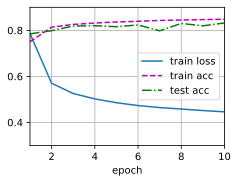

In [26]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 3.8 预测

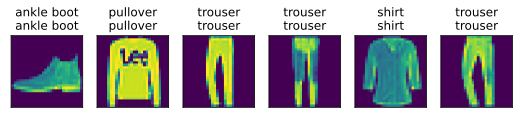

In [27]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)